# Applied Statistics

Today we will learn how to use various distributions (Poisson, Gaussian), different types of averages (mean, median, mode), consider distribution widths and uncertainties, and perform a goodness of fit test.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

## 1.  Distributions
To introduce this topic we will consider a practical example.  You are in London and want to get from Coram's Fields to King's Cross station.  You have two options: walk or take the Piccadilly line from Russel Square to King's Cross.  If you walk, you can expect it to take 14 minutes with an uncertainty of +/- 1 minute (standard deviation).  Model this as a Gaussian distribution and make a plot.  Tip: look at https://numpy.org/doc/2.3/reference/random/generated/numpy.random.normal.html with a large size to get a smooth distribution and make sure you add enough bins to the histogram

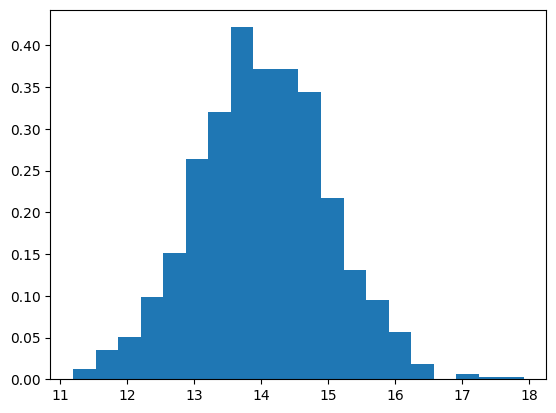

In [50]:
walk_all = np.random.normal(loc=14.0, scale=1.0, size=1000)
walk_hist = plt.hist(walk_all, bins=20, density=True)
plt.show()

In [53]:
walk_hist[0].sum(), walk_hist[1].sum()

(np.float64(2.9684157237456748), np.float64(305.7057103438133))

You should see a smooth Gaussian distribution centered around 14.  Now, we want to model the tube option.  To do this we need to consider two parts: the time it will take to walk to the tube station (6 minutes, +/- 0.5 mins) and the time it will take for the tube.  The second part is a little more complicated as it has a larger high time tail to the distribution.  First make a plot of the time to walk to the tube station:

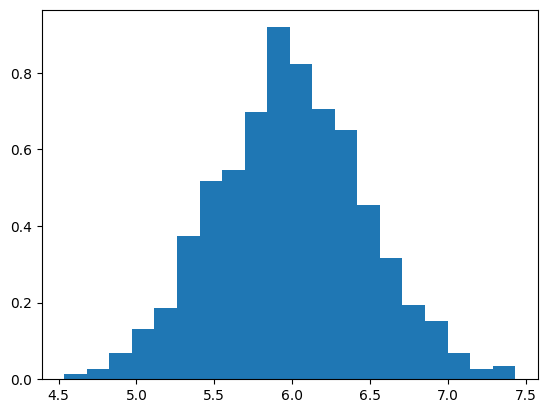

In [54]:
walk_tube = np.random.normal(loc=6.0, scale=0.5, size=1000)
walk_tube_hist = plt.hist(walk_tube, bins=20, density=True)
plt.show()

Now you want to model the time to take the tube.  This can be modelled as a Gaussian distribution with peak of 6 mins and uncertainty 3 mins.  However, there is a lower cutoff to this time as the fastest it can be done is 5 mins.  Tip: when you plot a histogram it will return the values and bin edges as arrays you can then use.  Tip: you can use the 'weight' argument to plot a histogram where you have the bin content numbers.  Make a plot of this distribution:

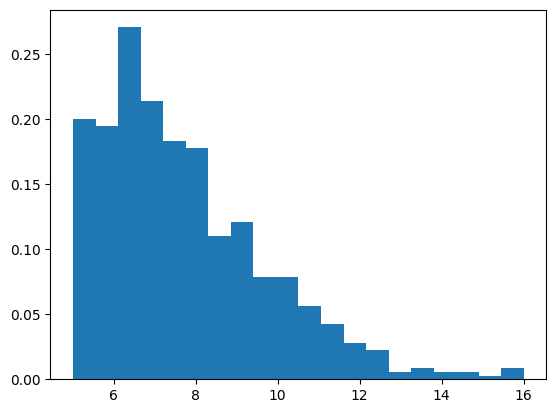

In [ ]:
tube = np.random.normal(loc=6.0, scale=3.0, size=1000)
tube = tube[tube > 5]
tube_hist = plt.hist(tube, bins=20, density=True)
plt.show()

Now you probably have an array of bin values showing this distribution, but not the full distribution itself.  To get the distribution of tube times we can use https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html (remember to scale your histogram values to make them probabilities)

In [78]:
tube_new = np.random.choice(a=tube_hist[1][:-1], size=1000, p=tube_hist[0]/tube_hist[0].sum())

Now you have your two distributions for the time it takes to walk to the tube station and the time it takes to take the tube.  Sum the two distributions to get a distribution for the total time it takes to take the tube from Coram's Fields to King's Cross.  Make a plot of this distribution:

In [79]:
tube_all = walk_tube + tube_new

Make a plot with both distributions (walking from Coram's Fields to King's Cross and walking to Russell Square and then taking the tube).  Tip: to show multiple histograms in one plot use `histtype='step'`:

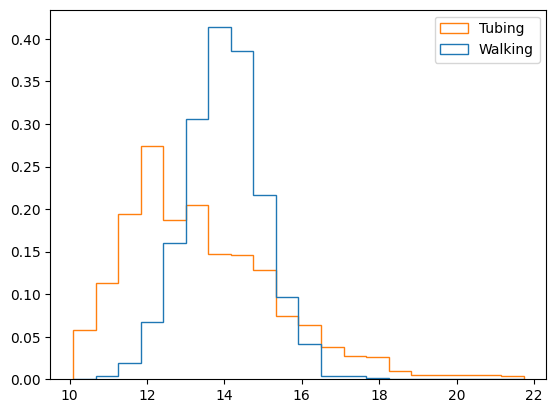

In [103]:
plt.hist([walk_all, tube_all], bins=20, density=True, histtype='step', label=['Walking', 'Tubing'])
plt.legend()
plt.show()

## 2. Averages: Means, Medians and Modes

Now let's get the mean of each distribution (hint: use https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

In [84]:
mean_walk = walk_all.mean()
mean_tube = tube_all.mean()
print(f"Mean of walking = {mean_walk:.2f} minutes and Mean of tubing = {mean_tube:.2f} minutes")

Mean of walking = 14.02 minutes and Mean of tubing = 13.42 minutes


Which is longer?  Now do the same thing for the median of the two distributions (use https://numpy.org/doc/stable/reference/generated/numpy.median.html)

In [85]:
med_walk = np.median(walk_all)
med_tube = np.median(tube_all)
print(f"Median of walking = {med_walk:.2f} minutes and Median of tubing = {med_tube:.2f} minutes")

Median of walking = 14.02 minutes and Median of tubing = 13.07 minutes


Why is the mean the same as the median for the walking, but not for taking the tube?

The mean is the same as the median for walking because it's a Gaussian distribution, whereas the tube distribution is the sum of a truncated Gaussian and a Gaussian.

### *Optional additional exercise: Modes

Now you can try to get the mode of each distribution if you have time.  One option (fine for our purposes) is to just find the largest bin in the histogram and say the center of that bin is the mode.  The second (beyond the scope of what we have done in this course) would be to fit a Gaussian to the peak of the distribution and call the mean of that fitted Gaussian the mode.

In [ ]:
# Read off the mode from the histograms!
mode_walk = 14
mode_tube = 12

print(f"Mode of walking = {mode_walk:.2f} minutes and Mode of tubing = {mode_tube:.2f}")

Mode of walking = 14.00 minutes and Mode of tubing = 12.00


## 3. How to Interpret these distributions

Now we can use this distributions directly to answer some questions.  The first question is, which method (walking or taking the tube) is more likely to get you to King's Cross in less than fifteen minutes?  To do this we need to integrate (just sum!) the two distributions below 14 mins and compare the two numbers.  Tip: make sure your two distributions have the same number of entries (if using them directly) or are noramlised to the same number (if you are taking them from histograms)

In [90]:
prob_walk_less_15 = (walk_all < 15).astype(int).sum()
prob_tube_less_15 = (tube_all < 15).astype(int).sum()
prob_walk_less_15, prob_tube_less_15

(np.int64(851), np.int64(805))

### Given you have more entries for getting to King's X in less than 15 minutes if you walked, that's the method which is more likely to get you to Kings X in less than 15 mins.

Now we will consider a different question.  Your train is leaving from King's Cross in exactly 16 minutes.  Should you walk or take the tube?  To answer this, repeat the same procedure as before but for 16 minutes.

In [91]:
prob_walk_less_16 = (walk_all < 16).astype(int).sum()
prob_tube_less_16 = (tube_all < 16).astype(int).sum()
prob_walk_less_16, prob_tube_less_16

(np.int64(974), np.int64(897))

### Again, given we have more entries when walking, you should walk to Kings X if you have a train leaving in exactly 16 mins.

## 4. Comparing to data and a goodness of fit test

Now you want to see if your model (Gaussian) of how long it takes you to walk from Coram's Fields to King's Cross is a good representation of how long it takes you.  So you walk the route 20 times, timing yourself to the nearest minute.  These are the results you get:

In [93]:
time_bins = np.array([12.0,13.0,14.0,15.0,16.0,17.0])
counts = np.array([1.0,6.0,8.0,3.0,2.0,1.0])

Now we will want to compare our data to our model.  To compare to expected values, we need to include the Poisson uncertainty on our data.  For a Poisson distribution with mean $\lambda$ the standard deviation is $\sqrt\lambda$.  Taking the counts to be the $\lambda$, calculate the standard deviation for each count (tip: you can do this in one line, if you are writing more code you are over-complicating it!)

In [96]:
counts_std = np.sqrt(counts)

Now plot the counts and their error bars (+/- 1 standard deviation) using https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

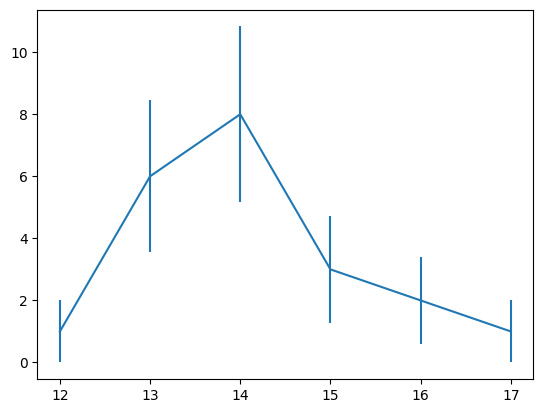

In [101]:
plt.errorbar(x=time_bins, y=counts, yerr=counts_std)
plt.show()

Now we want to plot our model distribution (the Gaussian walking model) on the same plot.  To do this, we will need to match the bins (width 1 min, bin edges on half-minutes) and scale the distribution to match 20 measurements.  Also get the counts from your scaled model histogram, we will need them for the next part.

array([1, 1, 5, 8, 5, 1, 1])

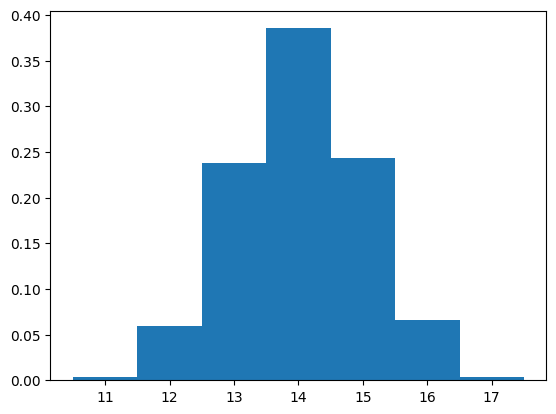

In [154]:
walk_all_hist = plt.hist(walk_all, bins=[10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5], density=True)
counts_walk_model = (walk_all_hist[0] * 23).astype(int)
counts_walk_model[counts_walk_model == 0] = 1
counts_walk_model

Print your data (the `counts`) and your model counts in each bin.  Make sure that the numbers are roughly similar, if they are very far apart check you have scaled your model correctly.  You should also be able to see this from the previous plot.  To make your life easier, make the model counts the same shape as the data counts (just throw away empty bins at the low and high ends)

In [155]:
counts, counts_walk_model[1:]

(array([1., 6., 8., 3., 2., 1.]), array([1, 5, 8, 5, 1, 1]))

You should see an array containing six values for each, if not go back and fix this!

### Goodness of fit test

Finally, we will perform a goodness of fit test between our model and our data.  The text statistic we will use is called $\chi^{2}$ and is defined as $\chi^{2} = \Sigma_{i}\frac{(\textrm{Data}_{i}-\textrm{Model}_{i})^{2}}{\textrm{Model}_{i}}$

Using your data and model predictions, calculate the $\chi^{2}$ for the walking model

In [156]:
len(counts), len(counts_walk_model[1:])

(6, 6)

In [157]:
chi_sq = (((counts - counts_walk_model[1:]) ** 2) / counts_walk_model[1:]).sum()
chi_sq

np.float64(2.0)

For statistical only uncertainties given by a Poisson distribution like we have here, we expect to get a $\chi^{2}/\textrm{NDOF}$ (where NDOF is number of degrees of freedom, in our case the number of data bins, so 6) of about one.  Is this the case here?

In [158]:
chi_sq / 6

np.float64(0.3333333333333333)

### No, this isn't the case. We have chi_sq / NDOF just over 0.3.